In [70]:
from utils import load_series_dfs
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import os
from shapely import wkt
import geopandas as gpd
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

In [2]:
series_dfs = load_series_dfs(data_dir='C:/Users/johan/Documents/FH_Master/data')

In [6]:
series_dfs.keys()

dict_keys(['FL_00024702.PLAN.MengeHH', 'FL_00024730.PLAN.MengeHH', 'FL_00352243.PLAN.MengeHH', 'FL_00352244.PLAN.MengeGA', 'FL_00352244.PLAN.MengeKW', 'FL_00024360.PLAN.MengeGA', 'FL_00352254.PLAN.MengeGA', 'FL_00025248.PLAN.MengeGA', 'FL_00024360.PLAN.MengeHH.2', 'FL_00024731.PLAN.MengeHH', 'FL_00024735.PLAN.MengeHH', 'FL_00024667.PLAN.MengeHH', 'FL_00352218.PLAN.MengeHH', 'FL_00025240.PLAN.MengeHH', 'FL_00025241.PLAN.MengeHH', 'FL_00020896.PLAN.MengeHH', 'FL_00342704.PLAN.MengeGA', 'FL_00352054.PLAN.MengeHH', 'CV_00348266.PLAN.Menge', 'FL_00352254.PLAN.MengeHH', 'FL_00352244.PLAN.MengeHH', 'FL_00342704.PLAN.MengeHH', 'CV_00003083.PLAN.Menge', 'CV_00003181.PLAN.Menge', 'CV_00003192.PLAN.Menge', 'CV_00003191.PLAN.Menge', 'CV_00003183.PLAN.Menge', 'CV_00001876.PLAN.Menge', 'CV_00003094.PLAN.Menge', 'CV_00003089.PLAN.Menge', 'CV_00007270.PLAN.Menge', 'CV_00007300.PLAN.Menge', 'KN_00001613.PLAN.Menge', 'KN_00000069.PLAN.Menge', 'KN_00000067.PLAN.Menge', 'CV_00007809.PLAN.Menge', 'FL_00352

In [7]:
# Alle Serien-Keys sammeln
keys = list(series_dfs.keys())

# Primary Key jeweils vor dem ersten Punkt
primary_keys = [key.split('.', 1)[0] for key in keys]

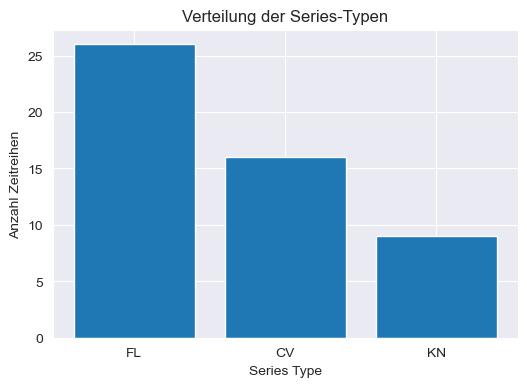

,Anzahl
FL,26
CV,16
KN,9


In [11]:
# 1. Nur die Typen ('FL', 'KN', 'CV') extrahieren
types = [pk[:2] for pk in primary_keys]

# 2. Häufigkeiten zählen
counts = Counter(types)

# 3. Als Balkendiagramm darstellen
plt.figure(figsize=(6,4))
plt.bar(counts.keys(), counts.values())
plt.xlabel('Series Type')
plt.ylabel('Anzahl Zeitreihen')
plt.title('Verteilung der Series-Typen')
plt.show()

# 4. (Optional) Als DataFrame anzeigen
df_counts = pd.DataFrame.from_dict(counts, orient='index', columns=['Anzahl'])
df_counts

In [12]:
identifiers = [key.split('Menge', 1)[1] for key in keys if 'Menge' in key]

# 3. Einzigartige Identifier bestimmen und sortieren
unique_identifiers = sorted(set(identifiers))

# 4. Ausgabe
print("Einzigartige Identifier nach '.Menge':")
for ident in unique_identifiers:
    print(ident)

Einzigartige Identifier nach '.Menge':

.1
GA
HH
HH.2
KW


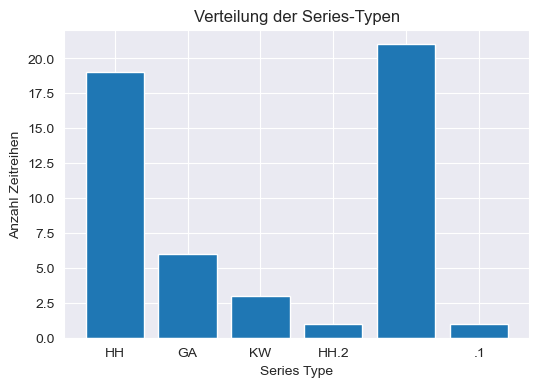

In [13]:
counts_types = Counter(identifiers)

# 3. Als Balkendiagramm darstellen
plt.figure(figsize=(6,4))
plt.bar(counts_types.keys(), counts_types.values())
plt.xlabel('Series Type')
plt.ylabel('Anzahl Zeitreihen')
plt.title('Verteilung der Series-Typen')
plt.show()

In [38]:
csv_path = os.path.join('..', 'data', 'gdm_ausspp_202505011423.csv')

# 2. Laden
df_knoten = pd.read_csv(csv_path)
df_knoten.head()

C:\Users\johan\AppData\Local\Temp\ipykernel_4504\4094773399.py:4: DtypeWarning: Columns (18,19,31,32,33,34,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df_knoten = pd.read_csv(csv_path)


,ausspp_id,nemesys_key,name,typ,station_id,betr,nbname,kname,at_nr,buchbar,...,periode,ablese,version_id,geom_g,geom_s1,klarname,h2_anteil,brennwertbezirk,mehrfach_ep,mengen_gen
0,1057060,KN_00370061,TEST_ZR_neu,1,29501.0,10002.0,NaN,NaN,NaN,0.0,...,NaN,NaN,2010,POINT (467432.38972410024 5298251.233962588),NaN,REKO_DL_SNG,NaN,NaN,NaN,NaN
1,1167717,KN_00400891,VAP_11_01,7,381704.0,11828.0,NaN,NaN,NaN,2.0,...,NaN,NaN,2012,POINT (638160.7506623925 5317827.993315005),NaN,NaN,NaN,NaN,NaN,NaN
2,1168161,KN_00400949,VAP_11_55,7,381704.0,11828.0,NaN,NaN,NaN,2.0,...,NaN,NaN,2018,POINT (639183.4338244994 5316622.424836051),NaN,NaN,NaN,NaN,NaN,NaN
3,1137248,KN_00397400,38302611_11_235,3,372131.0,11828.0,11627,G3E_FID: 38302611 ; BTI_OBJ_NR: 11627,NaN,1.0,...,NaN,NaN,2012,POINT (638188.4998389793 5317801.508679103),NaN,REKO_DL_NBG,NaN,235,NaN,NaN
4,1137527,KN_00397666,38302621_11_251,3,372131.0,11828.0,63341,G3E_FID: 38302621 ; BTI_OBJ_NR: 63341,NaN,1.0,...,NaN,NaN,2012,POINT (638206.87598522 5317780.619306837),NaN,REKO_DL_NBG,NaN,251,NaN,NaN


In [17]:
csv_path = os.path.join('..', 'data', 'gdm_mengem_202505011301.csv')

# 2. Laden
df_punkte = pd.read_csv(csv_path)
df_punkte.head()

,mengem_id,nemesys_key,name,typ,station_id,betr,nbname,anzms,idm,durchm,...,new_date,mod_date,uebtrag,hydrel,marktgebiet,version_id,geom_g,geom_s1,klarname,h2_anteil
0,996388,CV_00355719,TEst_WebGIS_edit,7,32845,10037.0,Wien,2.0,289.0,NaN,...,2021-12-10 16:05:22.960,2021-12-10 16:05:22.960,1.0,0,Ost,2005,LINESTRING (406803.627076863 5249919.785140501...,NaN,VIE,8.6
1,314199,CV_00003203,NNÖDürn.West2.Q,0,38281,11938.0,NOE.WEST.DUERNROH...FY.MW,0.0,590.0,0.0,...,2021-12-10 16:05:22.961,2021-12-10 16:05:22.961,0.0,0,Ost,2005,"LINESTRING (568836.266970327 5353561.28787479,...","LINESTRING (531376.180468073 5364547.85353879,...",NaN,NaN
2,34736,CV_00001904,OÖFSS311.HDL031.Q,0,33600,12008.0,OOE.VN.LGWTURBI.AS026..FY_GA.MW,0.0,NaN,0.0,...,2021-12-10 16:05:22.961,2021-12-10 16:05:22.961,0.0,0,Ost,2005,"LINESTRING (450596.590552117 5345185.83351994,...","LINESTRING (462474.277553419 5345659.32920793,...",NaN,NaN
3,34739,CV_00007908,OÖFSS312.HDL031.Q,0,33548,12008.0,OOE.VN.VOESTGT.AS152..FY_GA.MW,0.0,NaN,0.0,...,2021-12-10 16:05:22.961,2021-12-10 16:05:22.961,0.0,0,Ost,2005,"LINESTRING (449404.305353361 5347883.3247626, ...","LINESTRING (463340.951379113 5352214.90522529,...",NaN,NaN
4,627087,CV_00346063,LGVRugg.DRMRugg.Q\r\n,0,626972,10109.0,NaN,0.0,262.0,5.0,...,2021-12-10 16:05:22.961,2021-12-10 16:05:22.961,0.0,0,Liechtenstein,2005,"LINESTRING (85828.8911295151 5247432.35926299,...","LINESTRING (85828.8911295151 5247432.35926299,...",NaN,NaN


In [34]:
csv_path = os.path.join('..', 'data', 'gdm_verbz_202505011429.csv')

# 2. Laden
df_flaechen = pd.read_csv(csv_path)
df_flaechen.head()

,verbz_id,nemesys_key,name,nbname,beschr,komm,new_date,mod_date,rand_color,geom_g
0,918985,FL_00352230,T_01_Tirol,TIGAS-Erdgas Tirol GmbH,Unterland,#3a5fcd,NaN,NaN,#3a5fcd,MULTIPOLYGON (((208215.759904525 5208466.07990...
1,916754,FL_00025297,ST_02_Semmering,Energienetze Steiermark GmbH,Semmering,#cdbe70,NaN,NaN,#cdbe70,MULTIPOLYGON (((505580.726745652 5275506.84887...
2,918988,FL_00025241,ST_06_Grafendorf,Energienetze Steiermark GmbH,Grafendorf,#ee8262,NaN,NaN,#ee8262,MULTIPOLYGON (((576611.379498681 5233885.47556...
3,918989,FL_00352191,B_03_Oberwart,Netz Burgenland Erdgas GmbH,Oberwart,#a2cd5a,NaN,NaN,#a2cd5a,MULTIPOLYGON (((585315.470109405 5225725.82005...
4,478644,FL_00024679,OÖ_16_Windischgarsten,Netz Oberösterreich GmbH,Windischgarsten,#6b8e23,NaN,NaN,#6b8e23,MULTIPOLYGON (((440464.093530326 5287677.48503...


In [21]:
pk_fl = [pk for pk in primary_keys if pk.startswith('FL_')]
pk_kn = [pk for pk in primary_keys if pk.startswith('KN_')]
pk_cv = [pk for pk in primary_keys if pk.startswith('CV_')]


In [36]:
len(pk_fl)

26

In [37]:
df_fl = df_flaechen.loc[
    df_flaechen['nemesys_key'].isin(pk_fl),
    ['nemesys_key','geom_g']
].drop_duplicates(subset='nemesys_key', keep='first')


df_fl

,nemesys_key,geom_g
2,FL_00025241,MULTIPOLYGON (((576611.379498681 5233885.47556...
3,FL_00352191,MULTIPOLYGON (((585315.470109405 5225725.82005...
5,FL_00020896,MULTIPOLYGON (((442366.697798016 5277755.65335...
10,FL_00024730,MULTIPOLYGON (((458466.07960983 5343618.499366...
11,FL_00024735,MULTIPOLYGON (((455813.69099947 5345132.902266...
14,FL_00352244,MULTIPOLYGON (((445856.374990906 5365743.91906...
18,FL_00352430,MULTIPOLYGON (((484559.218368485 5193207.33573...
20,FL_00024731,MULTIPOLYGON (((449827.987549417 5340014.16225...
25,FL_00352054,MULTIPOLYGON (((168517.508101939 5271056.46775...
26,FL_00352189,MULTIPOLYGON (((604720.060484524 5244360.40220...


In [39]:
df_kn = df_knoten.loc[
    df_knoten['nemesys_key'].isin(pk_kn),
    ['nemesys_key','geom_g']
].drop_duplicates(subset='nemesys_key', keep='first')

df_kn

,nemesys_key,geom_g
180,KN_00001613,POINT (450734.776267296 5348285.84986857)
250,KN_00001886,POINT (450611.961082289 5345185.86386357)
782,KN_00000067,POINT (348607.848889366 5297852.03056291)
822,KN_00000069,POINT (343967.14792847 5313574.25495751)
903,KN_00001602,POINT (450569.747572944 5350088.14790274)
1286,KN_00000073,POINT (369183.552819 5318677.1276634)


In [47]:
df_cv = df_punkte.loc[
    df_punkte['nemesys_key'].isin(pk_cv),
    ['nemesys_key','geom_g']
].drop_duplicates(subset='nemesys_key', keep='first')

df_cv

,nemesys_key,geom_g
46,CV_00007270,"LINESTRING (495139.923586289 5168858.53083316,..."
69,CV_00007809,"LINESTRING (467860.514403169 5166803.53965425,..."
71,CV_00003094,"LINESTRING (526054.604836417 5177242.27772937,..."
113,CV_00007283,"LINESTRING (449767.375146095 5160803.15400325,..."
115,CV_00007300,"LINESTRING (414328.712057598 5157201.42221358,..."
126,CV_00348266,"LINESTRING (392147.529330797 5313778.26758383,..."
159,CV_00003432,"LINESTRING (103863.91923287 5279448.80541387, ..."
205,CV_00001876,"LINESTRING (361533.564776843 5315287.04147033,..."
225,CV_00003083,"LINESTRING (577073.151811071 5243467.79904798,..."
227,CV_00003089,"LINESTRING (556681.13170542 5211089.53371581, ..."


In [30]:
df_cv_unique = df_cv.drop_duplicates(subset='nemesys_key', keep='first')
df_cv_unique

,nemesys_key,geom_g
46,CV_00007270,"LINESTRING (495139.923586289 5168858.53083316,..."
69,CV_00007809,"LINESTRING (467860.514403169 5166803.53965425,..."
71,CV_00003094,"LINESTRING (526054.604836417 5177242.27772937,..."
113,CV_00007283,"LINESTRING (449767.375146095 5160803.15400325,..."
115,CV_00007300,"LINESTRING (414328.712057598 5157201.42221358,..."
126,CV_00348266,"LINESTRING (392147.529330797 5313778.26758383,..."
159,CV_00003432,"LINESTRING (103863.91923287 5279448.80541387, ..."
205,CV_00001876,"LINESTRING (361533.564776843 5315287.04147033,..."
225,CV_00003083,"LINESTRING (577073.151811071 5243467.79904798,..."
227,CV_00003089,"LINESTRING (556681.13170542 5211089.53371581, ..."


In [33]:
pk_fl

['FL_00024702',
 'FL_00024730',
 'FL_00352243',
 'FL_00352244',
 'FL_00352244',
 'FL_00024360',
 'FL_00352254',
 'FL_00025248',
 'FL_00024360',
 'FL_00024731',
 'FL_00024735',
 'FL_00024667',
 'FL_00352218',
 'FL_00025240',
 'FL_00025241',
 'FL_00020896',
 'FL_00342704',
 'FL_00352054',
 'FL_00352254',
 'FL_00352244',
 'FL_00342704',
 'FL_00352191',
 'FL_00352189',
 'FL_00352430',
 'FL_00352208',
 'FL_00024616']

In [48]:
df_mapping = pd.concat([df_fl, df_kn, df_cv], axis=0, ignore_index=True)

In [49]:
mapped_keys = df_mapping['nemesys_key'].tolist()

unmatched = sorted(set(primary_keys) - set(mapped_keys))

unmatched

[]

In [50]:
df_mapping

,nemesys_key,geom_g
0,FL_00025241,MULTIPOLYGON (((576611.379498681 5233885.47556...
1,FL_00352191,MULTIPOLYGON (((585315.470109405 5225725.82005...
2,FL_00020896,MULTIPOLYGON (((442366.697798016 5277755.65335...
3,FL_00024730,MULTIPOLYGON (((458466.07960983 5343618.499366...
4,FL_00024735,MULTIPOLYGON (((455813.69099947 5345132.902266...
5,FL_00352244,MULTIPOLYGON (((445856.374990906 5365743.91906...
6,FL_00352430,MULTIPOLYGON (((484559.218368485 5193207.33573...
7,FL_00024731,MULTIPOLYGON (((449827.987549417 5340014.16225...
8,FL_00352054,MULTIPOLYGON (((168517.508101939 5271056.46775...
9,FL_00352189,MULTIPOLYGON (((604720.060484524 5244360.40220...


In [53]:
unique_primary = set(primary_keys)
mapped_keys = set(df_mapping['nemesys_key'].astype(str).str.strip())

# 3. Differenz bilden
unmatched = unique_primary - mapped_keys

print("Anzahl unique primary keys:", len(unique_primary))
print("Anzahl gemappter keys:",         len(mapped_keys))
print("Anzahl unmatched:",              len(unmatched))
print("Unmatched keys:",                 sorted(unmatched))

Anzahl unique primary keys: 43
Anzahl gemappter keys: 43
Anzahl unmatched: 0
Unmatched keys: []


In [55]:
counts = Counter(primary_keys)

# 3. Filtere diejenigen mit mehr als 1 Vorkommen
duplicates = [pk for pk, cnt in counts.items() if cnt > 1]

print("Primary Keys mit Duplikaten:")
for pk in duplicates:
    print(f"{pk}  (Vorkommen: {counts[pk]})")

Primary Keys mit Duplikaten:
FL_00352244  (Vorkommen: 3)
FL_00024360  (Vorkommen: 2)
FL_00352254  (Vorkommen: 2)
FL_00342704  (Vorkommen: 2)
KN_00001613  (Vorkommen: 2)
KN_00001886  (Vorkommen: 2)
KN_00001602  (Vorkommen: 2)


In [59]:
df_mapping['geometry'] = df_mapping['geom_g'].apply(wkt.loads)

In [60]:
gdf = gpd.GeoDataFrame(df_mapping, geometry='geometry', crs='EPSG:32633')

In [63]:
countries_url = "https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson"
world = gpd.read_file(countries_url)
if 'ADMIN' in world.columns:
    austria = world[world['ADMIN'] == 'Austria'].to_crs(gdf.crs)
else:
    austria = world[world['name'] == 'Austria'].to_crs(gdf.crs)

In [68]:
polygons = gdf[gdf.geometry.geom_type.isin(['Polygon','MultiPolygon'])]
lines    = gdf[gdf.geometry.geom_type.isin(['LineString','MultiLineString'])]
points   = gdf[gdf.geometry.geom_type == 'Point']

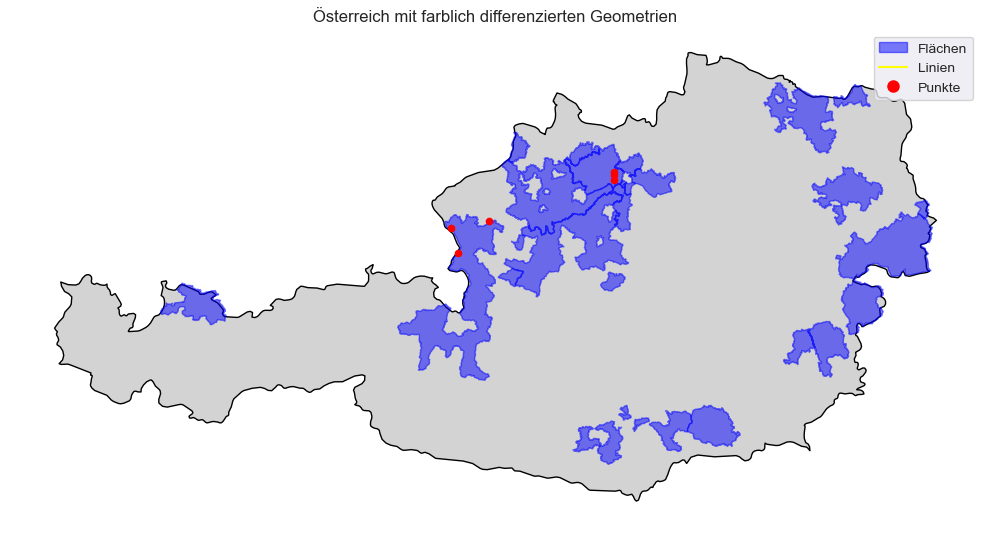

In [78]:
# 5. Plot bauen
fig, ax = plt.subplots(figsize=(10,10))
austria.plot(ax=ax, color='lightgray', edgecolor='black')

polygons.plot(ax=ax,
              facecolor='blue',
              edgecolor='blue',
              alpha=0.5)
lines.plot(ax=ax,
           color='black',
           linewidth=2,
           zorder=2)
points.plot(ax=ax,
            color='red',
            markersize=20)

ax.set_title("Österreich mit farblich differenzierten Geometrien")
ax.set_axis_off()

# 6. Manuelle Legende
legend_elements = [
    Patch(facecolor='blue', edgecolor='blue', alpha=0.5, label='Flächen'),
    Line2D([0], [0], color='yellow', lw=1.5, label='Linien'),
    Line2D([0], [0], marker='o', color='red', linestyle='', markersize=8, label='Punkte'),
]
ax.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

In [72]:
print(gdf.geometry.geom_type.value_counts())

MultiPolygon    21
LineString      16
Point            6
Name: count, dtype: int64


,nemesys_key,geom_g,geometry
0,FL_00025241,MULTIPOLYGON (((576611.379498681 5233885.47556...,"MULTIPOLYGON (((576611.379 5233885.476, 576597..."
1,FL_00352191,MULTIPOLYGON (((585315.470109405 5225725.82005...,"MULTIPOLYGON (((585315.47 5225725.82, 585316.0..."
2,FL_00020896,MULTIPOLYGON (((442366.697798016 5277755.65335...,"MULTIPOLYGON (((442366.698 5277755.653, 442250..."
3,FL_00024730,MULTIPOLYGON (((458466.07960983 5343618.499366...,"MULTIPOLYGON (((458466.08 5343618.499, 458464...."
4,FL_00024735,MULTIPOLYGON (((455813.69099947 5345132.902266...,"MULTIPOLYGON (((455813.691 5345132.902, 455810..."
5,FL_00352244,MULTIPOLYGON (((445856.374990906 5365743.91906...,"MULTIPOLYGON (((445856.375 5365743.919, 445856..."
6,FL_00352430,MULTIPOLYGON (((484559.218368485 5193207.33573...,"MULTIPOLYGON (((484559.218 5193207.336, 484563..."
7,FL_00024731,MULTIPOLYGON (((449827.987549417 5340014.16225...,"MULTIPOLYGON (((449827.988 5340014.162, 449829..."
8,FL_00352054,MULTIPOLYGON (((168517.508101939 5271056.46775...,"MULTIPOLYGON (((168517.508 5271056.468, 168586..."
9,FL_00352189,MULTIPOLYGON (((604720.060484524 5244360.40220...,"MULTIPOLYGON (((604720.06 5244360.402, 604761...."
